In [35]:
import os
import pandas as pd

# Initialize variables
max_cs_accuracy = 0
min_steps = float('inf')
min_cs_accuracy_greater_than_sc = float('inf')
max_cs_acc_with_step_constraints = 0

df_max_cs_accuracy = None
df_min_steps = None
df_min_cs_accuracy_greater_than_sc = None
df_max_cs_acc_with_step_constraints = None

max_cs_accuracy_N = None
max_cs_accuracy_threshold = None
min_steps_N = None
min_steps_threshold = None
min_cs_accuracy_greater_than_sc_N = None
min_cs_accuracy_greater_than_sc_threshold = None
max_cs_acc_with_step_constraints_N = None
max_cs_acc_with_step_constraints_threshold = None

# List all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        
        # Extract N and threshold from the filename
        parts = filename.split("_")
        N = int(parts[4][0])
        threshold = float(parts[2])
        
        # Calculate CS accuracy, steps, and SC accuracy for the current DataFrame
        cs_accuracy = df['CS_correctness'].mean()
        steps = df['CS_steps'].mean()
        sc_accuracy = df['SC_correctness'].mean()
        es_avg_steps = df['ES_steps'].mean()
        asc_avg_steps = df['asc_steps'].mean()
        
        # Check for the best CS accuracy
        if cs_accuracy > max_cs_accuracy:
            max_cs_accuracy = cs_accuracy
            df_max_cs_accuracy = df
            max_cs_accuracy_N = N
            max_cs_accuracy_threshold = threshold
        
        # Check for the least number of steps
        if steps < min_steps:
            min_steps = steps
            df_min_steps = df
            min_steps_N = N
            min_steps_threshold = threshold
        
        # Check for the CS accuracy greater than SC with the least difference
        if cs_accuracy > sc_accuracy and cs_accuracy - sc_accuracy < min_cs_accuracy_greater_than_sc:
            min_cs_accuracy_greater_than_sc = cs_accuracy - sc_accuracy
            df_min_cs_accuracy_greater_than_sc = df
            min_cs_accuracy_greater_than_sc_N = N
            min_cs_accuracy_greater_than_sc_threshold = threshold
        
        # Check for CS accuracy with step constraints
        if steps < es_avg_steps and steps < asc_avg_steps:
            if cs_accuracy > max_cs_acc_with_step_constraints:
                max_cs_acc_with_step_constraints = cs_accuracy
                df_max_cs_acc_with_step_constraints = df
                max_cs_acc_with_step_constraints_N = N
                max_cs_acc_with_step_constraints_threshold = threshold

# Print the results
print("DataFrame with the best CS Accuracy:")
print("N:", max_cs_accuracy_N)
print("Threshold:", max_cs_accuracy_threshold)
print("CS Accuracy:", max_cs_accuracy)
print("Steps:", df_max_cs_accuracy['CS_steps'].mean())

print("\nDataFrame with the least number of steps:")
print("N:", min_steps_N)
print("Threshold:", min_steps_threshold)
print("CS Accuracy:", df_min_steps['CS_correctness'].mean())
print("Steps:", min_steps)

print("\nDataFrame with CS accuracy greater than SC and closest to SC:")
print("N:", min_cs_accuracy_greater_than_sc_N)
print("Threshold:", min_cs_accuracy_greater_than_sc_threshold)
print("CS Accuracy:", df_min_cs_accuracy_greater_than_sc['CS_correctness'].mean())
print("SC Accuracy:", df_min_cs_accuracy_greater_than_sc['SC_correctness'].mean())
print("Steps:", df_min_cs_accuracy_greater_than_sc['CS_steps'].mean())

print("\nDataFrame with the highest CS accuracy and CS steps smaller than both ES and ASC average steps:")
print("N:", max_cs_acc_with_step_constraints_N)
print("Threshold:", max_cs_acc_with_step_constraints_threshold)
print("CS Accuracy:", max_cs_acc_with_step_constraints)
print("Steps:", df_max_cs_acc_with_step_constraints['CS_steps'].mean())


DataFrame with the best CS Accuracy:
N: 7
Threshold: 0.3
CS Accuracy: 0.48141263940520446
Steps: 12.256505576208179

DataFrame with the least number of steps:
N: 2
Threshold: 0.1
CS Accuracy: 0.4345724907063197
Steps: 3.345724907063197

DataFrame with CS accuracy greater than SC and closest to SC:
N: 2
Threshold: 0.4
CS Accuracy: 0.43977695167286246
SC Accuracy: 0.437546468401487
Steps: 8.531226765799257

DataFrame with the highest CS accuracy and CS steps smaller than both ES and ASC average steps:
N: 7
Threshold: 0.3
CS Accuracy: 0.48141263940520446
Steps: 12.256505576208179


In [36]:
es_avg_steps

15.600371747211897

In [37]:
asc_avg_steps

13.378438661710037

# Abalation Study 3 (Performance on other dataset)

In [32]:
df = df_max_cs_acc_with_step_constraints

/tmp/ipykernel_945518/722280327.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Name', y='value', hue='Metric', data=correctness_data, ci=None)


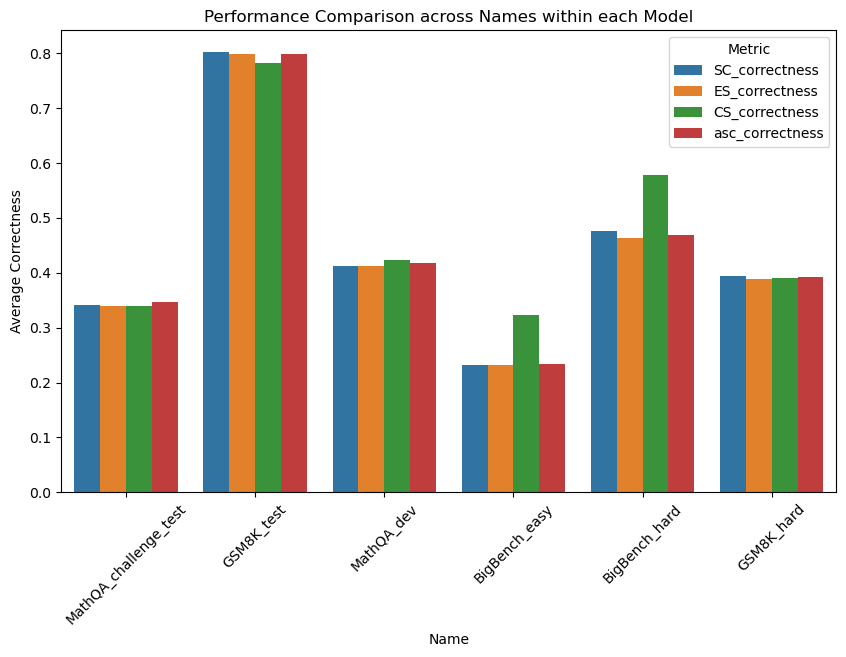

/tmp/ipykernel_945518/722280327.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y='value', hue='Metric', data=correctness_data, ci=None)


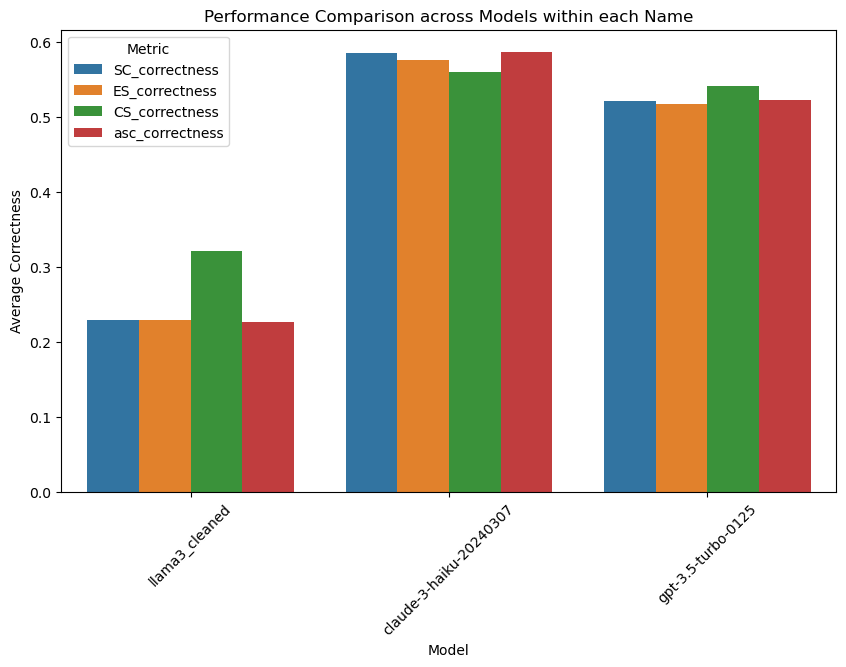

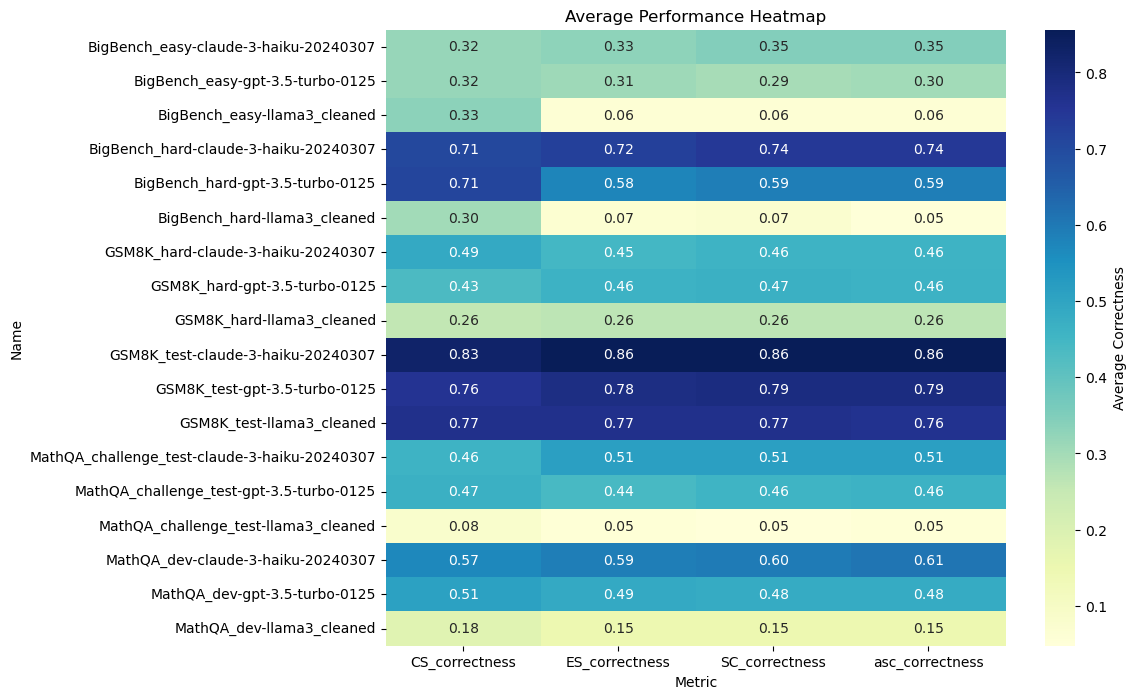

/tmp/ipykernel_945518/722280327.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Name', y='value', hue='Model', data=steps_data, ci=None)


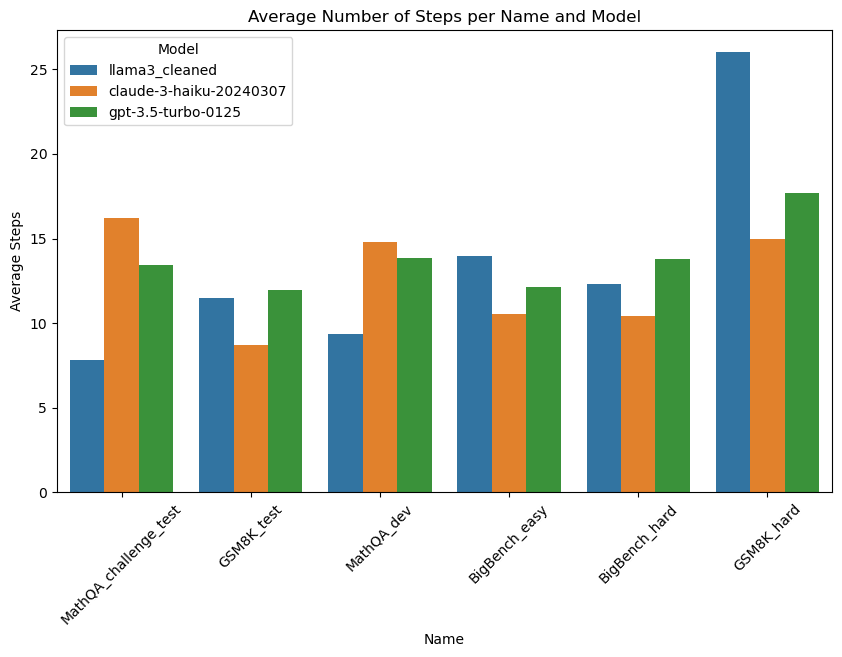

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame that includes 'asc_correctness' and 'asc_steps'

# Melt the DataFrame to convert it into a long format suitable for plotting
# Include 'asc_correctness' and 'asc_steps' in value_vars
melted_df = pd.melt(df, id_vars=['Name', 'Model'], value_vars=['SC_correctness', 'ES_correctness', 'CS_correctness', 'asc_correctness', 'asc_steps'], var_name='Metric')

# Plot 1: Compare average performance across different Names within each Model for correctness metrics
plt.figure(figsize=(10, 6))
# Filter melted_df to exclude 'asc_steps' for correctness comparison
correctness_data = melted_df[melted_df['Metric'] != 'asc_steps']
sns.barplot(x='Name', y='value', hue='Metric', data=correctness_data, ci=None)
plt.title('Performance Comparison across Names within each Model')
plt.xlabel('Name')
plt.ylabel('Average Correctness')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Compare average performance across different Models within each Name for correctness metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='value', hue='Metric', data=correctness_data, ci=None)
plt.title('Performance Comparison across Models within each Name')
plt.xlabel('Model')
plt.ylabel('Average Correctness')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Heatmap to visualize the average performance for each combination of Name and Model for correctness metrics
heatmap_data = correctness_data.groupby(['Name', 'Model', 'Metric'])['value'].mean().unstack(level=-1)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average Correctness'})
plt.title('Average Performance Heatmap')
plt.xlabel('Metric')
plt.ylabel('Name')
plt.show()

# Plot 4: Visualize the average number of steps (asc_steps only)
plt.figure(figsize=(10, 6))
steps_data = melted_df[melted_df['Metric'] == 'asc_steps']
sns.barplot(x='Name', y='value', hue='Model', data=steps_data, ci=None)
plt.title('Average Number of Steps per Name and Model')
plt.xlabel('Name')
plt.ylabel('Average Steps')
plt.legend(title='Model')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_945518/157428221.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Name', y='value', hue='Metric', data=melted_df, ci=None)


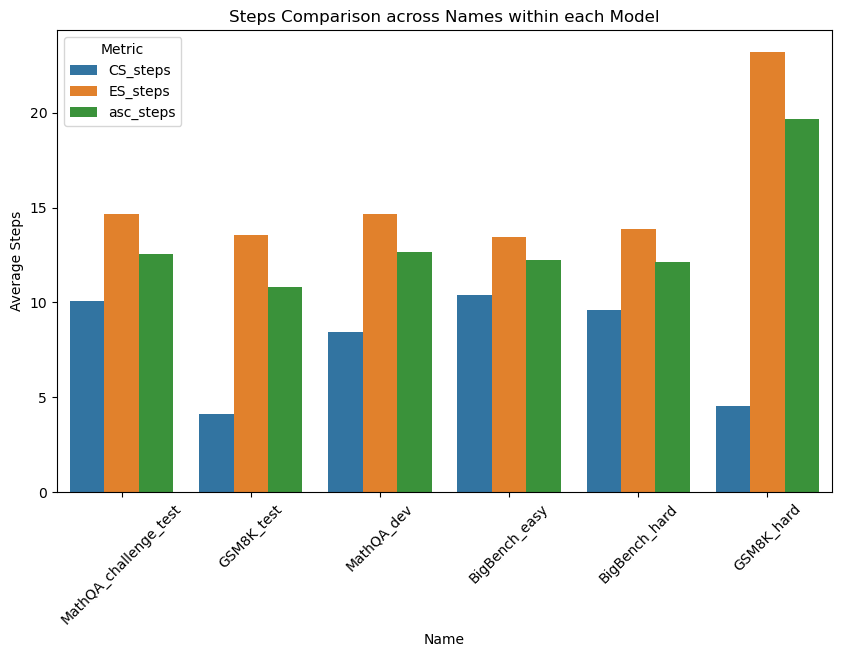

/tmp/ipykernel_945518/157428221.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y='value', hue='Metric', data=melted_df, ci=None)


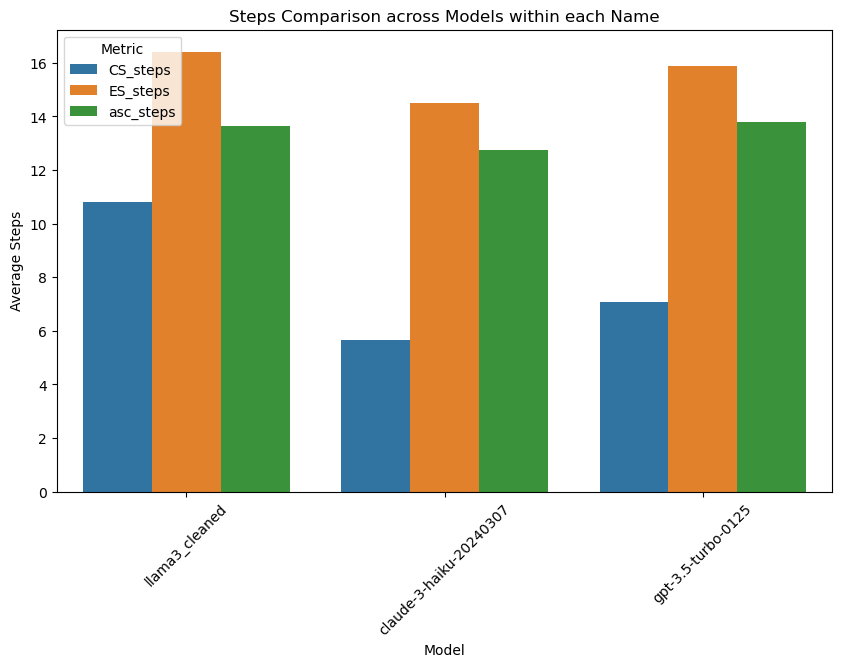

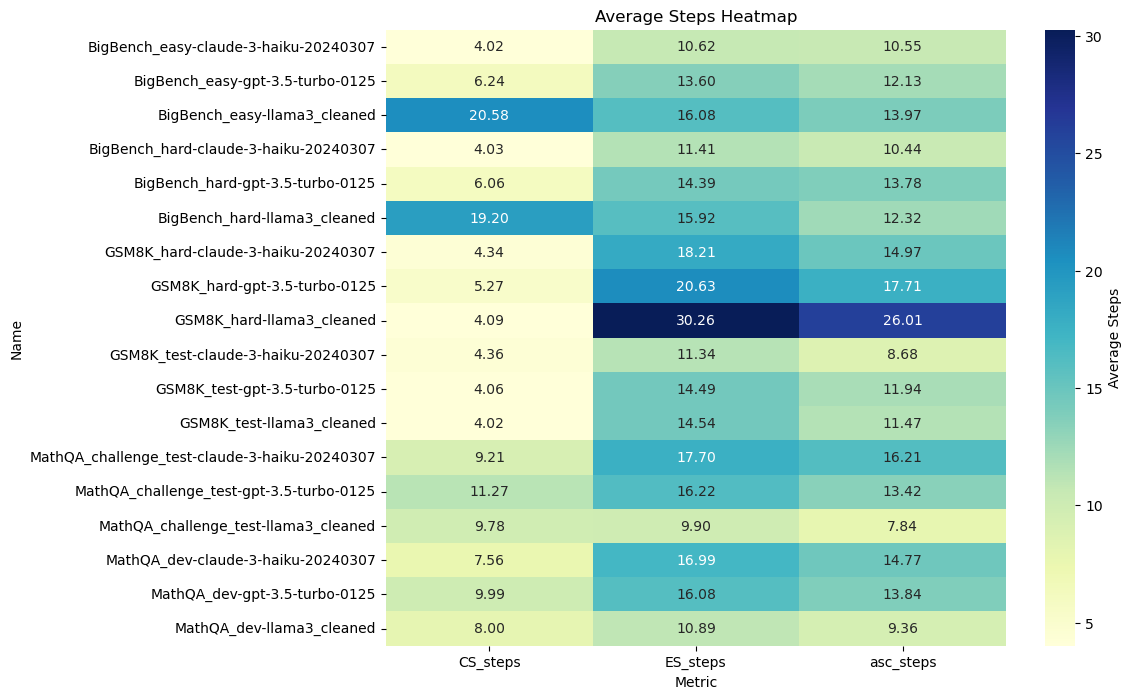

In [39]:
melted_df = pd.melt(df, id_vars=['Name', 'Model'], value_vars=['CS_steps', 'ES_steps', 'asc_steps'], var_name='Metric')

# Plot 1: Compare average steps across different Names within each Model
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='value', hue='Metric', data=melted_df, ci=None)
plt.title('Steps Comparison across Names within each Model')
plt.xlabel('Name')
plt.ylabel('Average Steps')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Compare average steps across different Models within each Name
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='value', hue='Metric', data=melted_df, ci=None)
plt.title('Steps Comparison across Models within each Name')
plt.xlabel('Model')
plt.ylabel('Average Steps')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Heatmap to visualize the average steps for each combination of Name and Model
heatmap_data = melted_df.groupby(['Name', 'Model', 'Metric'])['value'].mean().unstack(level=-1)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average Steps'})
plt.title('Average Steps Heatmap')
plt.xlabel('Metric')
plt.ylabel('Name')
plt.show()


# Ablation Study 1 (tradeoff between acc and step_reduction)

In [22]:
base_acc = df.SC_correctness.sum() / len(df)

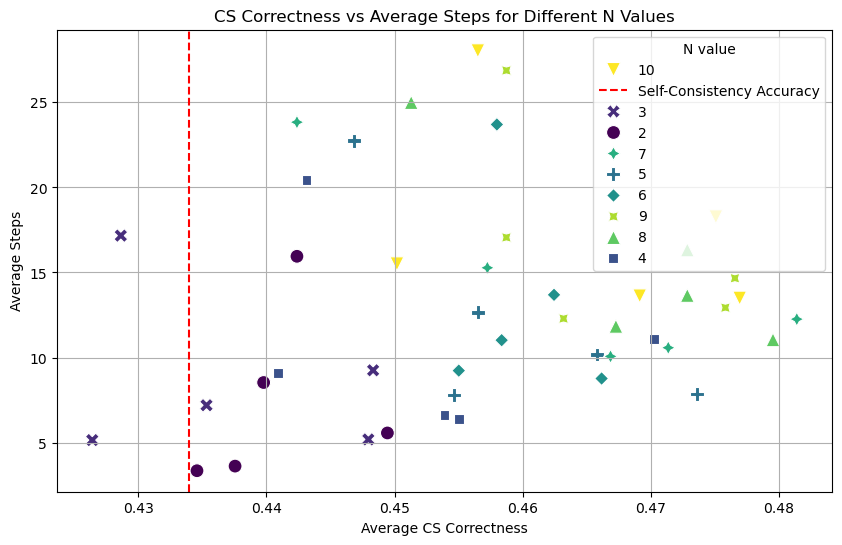

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize an empty list to store DataFrames
dataframes = []

# Dictionary to hold aggregated data
aggregated_data = {}

# List all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Extract the threshold value and stop mechanism from the filename
        threshold_value = float(filename.split('_threshold_')[1].split('_')[0])
        
        # Check if the threshold is 0.5 and the stop mechanism is "PositiveN"
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        
        # Extract the N value from the filename
        n_value = int(filename.split('_N_')[1].split('.')[0])
        
        # Calculate average correctness and steps
        avg_correctness = df['CS_correctness'].mean()
        avg_steps = df['CS_steps'].mean()
        
        # Check if this N value is already in the dictionary
        if n_value not in aggregated_data:
            aggregated_data[n_value] = {'correctness': [], 'steps': []}
        
        # Append the data
        aggregated_data[n_value]['correctness'].append(avg_correctness)
        aggregated_data[n_value]['steps'].append(avg_steps)

# Prepare data for plotting
plot_data = {
    'N_value': [],
    'Average_Correctness': [],
    'Average_Steps': []
}

for n, values in aggregated_data.items():
    plot_data['N_value'].extend([n] * len(values['correctness']))
    plot_data['Average_Correctness'].extend(values['correctness'])
    plot_data['Average_Steps'].extend(values['steps'])

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)

# Plotting
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='Average_Correctness', y='Average_Steps', hue='N_value', style='N_value', palette='viridis', s=100, legend="full")
plt.title('CS Correctness vs Average Steps for Different N Values')
plt.xlabel('Average CS Correctness')
plt.ylabel('Average Steps')

# Add vertical line for base accuracy
plt.axvline(x=base_acc, color='red', linestyle='--', linewidth=1.5, label='Self-Consistency Accuracy')

# Modify legend to display one entry per N value
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
unique_handles = [handles[labels.index(label)] for label in unique_labels]
plt.legend(unique_handles, unique_labels, title='N value')

plt.grid(True)
plt.show()

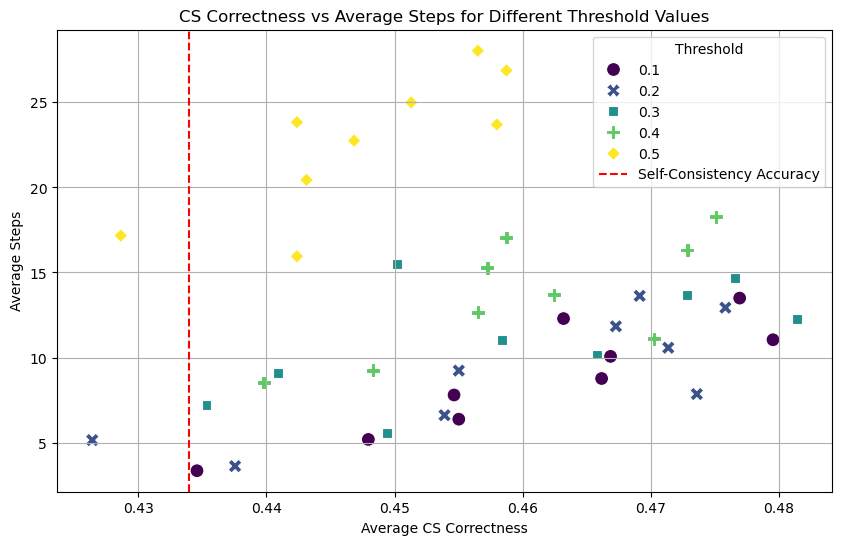

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Directory containing the CSV files
directory = "../../result/experiments_output/test_N_threshold"

# Initialize an empty list to store DataFrames
dataframes = []

# Dictionary to hold aggregated data
aggregated_data = {}

# List all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        
        # Extract the threshold value from the filename
        threshold_value = float(filename.split('_threshold_')[1].split('_')[0])
        
        # Calculate average correctness and steps
        avg_correctness = df['CS_correctness'].mean()
        avg_steps = df['CS_steps'].mean()
        
        # Check if this threshold value is already in the dictionary
        if threshold_value not in aggregated_data:
            aggregated_data[threshold_value] = {'correctness': [], 'steps': []}
        
        # Append the data
        aggregated_data[threshold_value]['correctness'].append(avg_correctness)
        aggregated_data[threshold_value]['steps'].append(avg_steps)

# Prepare data for plotting
plot_data = {
    'Threshold': [],
    'Average_Correctness': [],
    'Average_Steps': []
}

for threshold, values in aggregated_data.items():
    plot_data['Threshold'].extend([threshold] * len(values['correctness']))
    plot_data['Average_Correctness'].extend(values['correctness'])
    plot_data['Average_Steps'].extend(values['steps'])

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)



# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='Average_Correctness', y='Average_Steps', hue='Threshold', style='Threshold', palette='viridis', s=100)
plt.title('CS Correctness vs Average Steps for Different Threshold Values')
plt.xlabel('Average CS Correctness')
plt.ylabel('Average Steps')
# Add vertical line for base accuracy
plt.axvline(x=base_acc, color='red', linestyle='--', linewidth=1.5, label='Self-Consistency Accuracy')
plt.legend(title='Threshold')
plt.grid(True)
plt.show()